In [3]:
%load_ext rich

import pathlib
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact
from interpret.glassbox import ExplainableBoostingClassifier, APLRClassifier
from interpret import show

sns.set_context("notebook")
sns.set_palette("colorblind")

The rich extension is already loaded. To reload it, use:
  %reload_ext rich


In [11]:
df = pd.read_csv(pathlib.Path.home() / "data" / "dataverse" / "student_performance" / "data.csv")
df = df.dropna(subset=["F3Grade"])
print(df.shape)
y = np.array(df.pop("F3Grade"))
for col in df:
    if col.endswith("Grade"):
        del df[col]
df

(1708, 62)


,Type_of_Institute,County,Gender,Age,Disability,Religion,LivedP,ConflictsP,FStructure,DFeesPay,...,STlab,SLibrary,SClab,SElectricity,SInternet,ETlab,ELibrary,EClab,EElectricity,EInternet
0,mt,mk,f,2.0,no,2.0,no,no,sp,no,...,6.0,6.0,4.0,3.0,2.0,5.0,5.0,3.0,3.0,3.0
1,mt,mk,f,3.0,no,1.0,no,yes,sp,yes,...,6.0,6.0,6.0,5.0,4.0,5.0,5.0,4.0,4.0,3.0
2,mt,mk,m,3.0,no,1.0,yes,yes,nf,no,...,6.0,6.0,5.0,4.0,4.0,1.0,1.0,2.0,3.0,3.0
3,mt,mk,m,2.0,no,2.0,yes,yes,ef,yes,...,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,3.0,3.0
4,mt,mk,m,3.0,no,1.0,yes,no,ef,no,...,5.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,UN,KM,F,2.0,NO,1.0,yes,no,nf,no,...,5.0,6.0,6.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0
1716,UN,KM,F,2.0,NO,1.0,yes,no,nf,no,...,3.0,4.0,5.0,4.0,1.0,4.0,3.0,3.0,3.0,5.0
1717,UN,KM,F,2.0,NO,1.0,yes,YES,EF,no,...,5.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,3.0,1.0
1718,UN,KM,F,2.0,NO,1.0,no,no,EF,yes,...,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0


<Axes: ylabel='Count'>

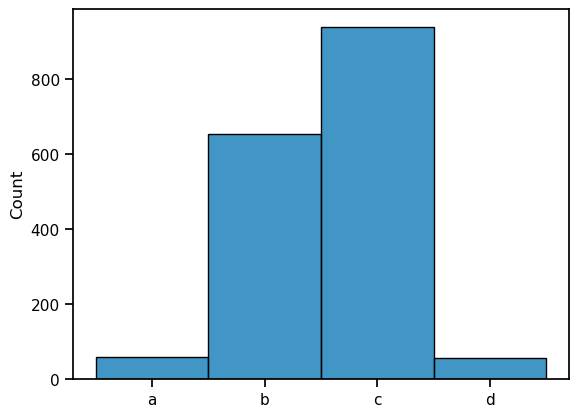

In [12]:
y = [x.lower() for x in y]
sns.histplot(y)

In [13]:
# Simplify to AB or CD
y = [1 if x in "ab" else 0 for x in y]